### Data Organization
Federal Reserve Economic Data, or FRED, is a project by the Economic Research department of the Federal Reserve Bank of St Louis. FRED collects over 200,000 U.S. and international economic time series, from 69 different sources, on a single website. Data coverage includes all major areas of macroeconomic analysis: growth, inflation, employment, interest rates, exchange rates, production and consumption, income and expenditure, savings and investment, and more.
#### DESCRIPTION
Growth, employment, inflation, labor, manufacturing and other US economic statistics from the research department of the Federal Reserve Bank of St. Louis.

Note: This dataset is a free resource from https://data.nasdaq.com/data/FRED-federal-reserve-economic-data and contain all columns for FRED/GDPPOT with no filters applied. 

The data is adjusted to remove the effects of inflation.

### Real Potencial Gross Domestic Product

This Analysis is to understand about the real potencial GDP and how CBO's estimative it's correct on premise that it's the real value of the GDP. 
The data is collected since January 1949, is a growth indicator about the GDP around the next years

#### What is Real Potencial Gross Domestic Product ?

Real potential GDP is the CBO’s estimate of the output the economy would produce with a high rate of use of its capital and labor resources. The data is adjusted to remove the effects of inflation.

In [1]:
#!pip install nasdaq-data-link
#!pip install quandl

In [2]:
# Import 
import nasdaqdatalink
import quandl

In [3]:
# getting the data from quandl API
df = quandl.get('FRED/GDPPOT')

In [4]:
# Verifing the first data from dataset
df.head()

,Value
Date,
1949-01-01,2102.982630
1949-04-01,2130.581305
1949-07-01,2159.340530
1949-10-01,2186.844859
1950-01-01,2216.058359


In [5]:
# Imports necessary frameworks
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.dates as mdates
import seaborn as sns

In [6]:
# Verifing the data types from df
df.dtypes

Value    float64
dtype: object

In [7]:
# Reset index
RGDP_df = df.reset_index()

In [8]:
# Set the values to plot in a graphic
date_1 = RGDP_df["Date"]
value_RGDP = RGDP_df["Value"]

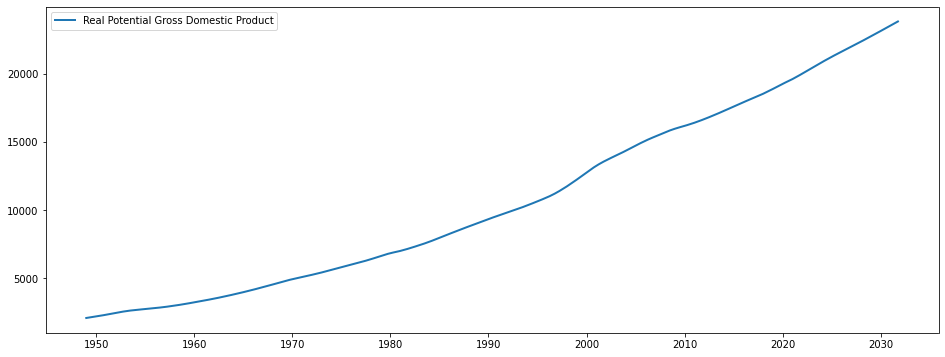

In [9]:
# Plot the date x Values
fig, ax = plt.subplots(figsize = (16,6))
ax.plot(date_1, value_RGDP, linewidth= 2, alpha=1.0, label="Real Potential Gross Domestic Product")
plt.legend()
plt.show()

### Gross Domestic Product

#### What is GDP ?

Is the total monetary of finished goods and services produced within a country's borders in a specific time period to measure the total domestic production and function as a scorecard of given country's economic health

In [10]:
# getting the data from quandl API
df_2 = quandl.get('FRED/GDP')

In [11]:
# Verifing the dataset
df_2.head()

,Value
Date,
1947-01-01,243.164
1947-04-01,245.968
1947-07-01,249.585
1947-10-01,259.745
1948-01-01,265.742


In [12]:
# Reset index
GDP = df_2.reset_index()

In [13]:
# Verifing the data types
GDP.dtypes

Date     datetime64[ns]
Value           float64
dtype: object

In [14]:
# Separating the values in two variables
date_GDP = GDP["Date"]
value_GDP = GDP["Value"]

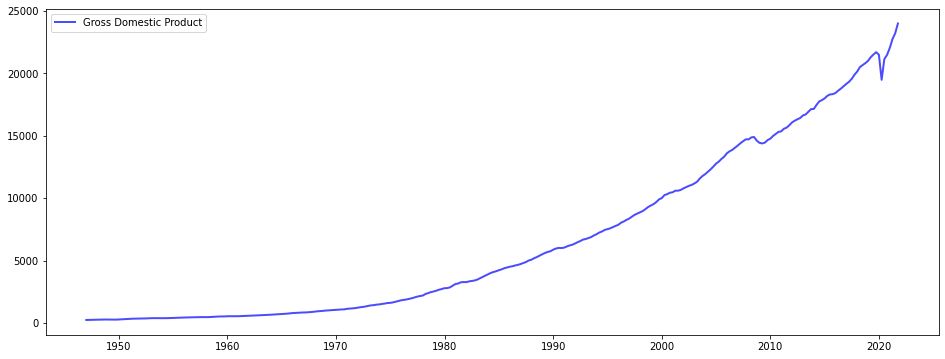

In [15]:
# Plotting the graphic and add a label to the line 
fig, ax = plt.subplots(figsize = (16,6))
ax.plot(date_GDP, value_GDP, linewidth= 2, color='blue', alpha=0.7, label="Gross Domestic Product")
plt.legend()
plt.show()

### GDP Gap

#### What Is GDP Gap ?

GDP gap is the difference between the actual GDP and the potencial GDP of an economy as represented by the long-term trend. A negative GDP gap represents the lost output of a country's economy resulting from the failure to create sufficient jobs. A positive GDP gap, generally signifies that an economy is overheated and at risk of high inflation

In [16]:
# Calculating the GDP Gap
GDP_Gap = ((value_GDP - value_RGDP) / value_RGDP).dropna()

In [17]:
# Analysing the output of GDP_Gap
GDP_Gap

0     -0.884372
1     -0.884554
2     -0.884416
3     -0.881224
4     -0.880083
         ...   
295    0.056891
296    0.078945
297    0.107715
298    0.124512
299    0.157036
Name: Value, Length: 300, dtype: float64

In [18]:
# Creating a DataFrame
new_gd_gap = pd.DataFrame(GDP_Gap)

In [19]:
# Adding Date to DataFrame
new_gd_gap['Date'] = date_GDP

In [20]:
# Separating the values in two variables
date = new_gd_gap["Date"]
value = new_gd_gap["Value"]

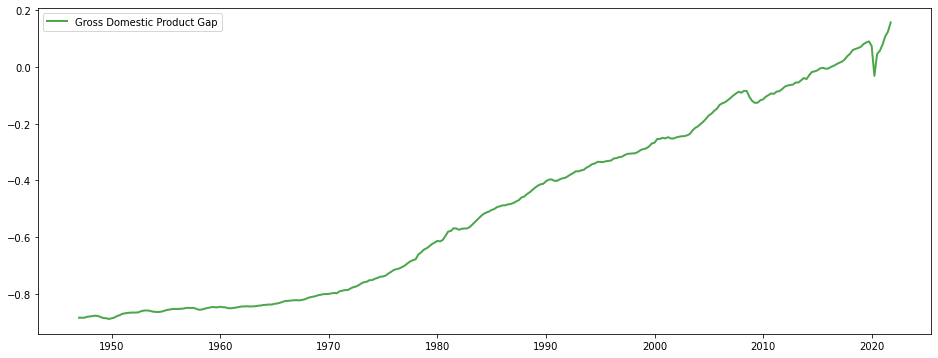

In [21]:
# Plotting the graphic and add a label to the line 
fig, ax = plt.subplots(figsize = (16,6))
ax.plot(date, value, linewidth= 2, color='green', alpha=0.7, label="Gross Domestic Product Gap")
plt.legend()